In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Read the dataset

In [66]:
data=pd.read_excel('iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
data.shape

(150, 5)

In [70]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# Do necessary pre-processing steps.

In [71]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
#handle missing values in the dataset

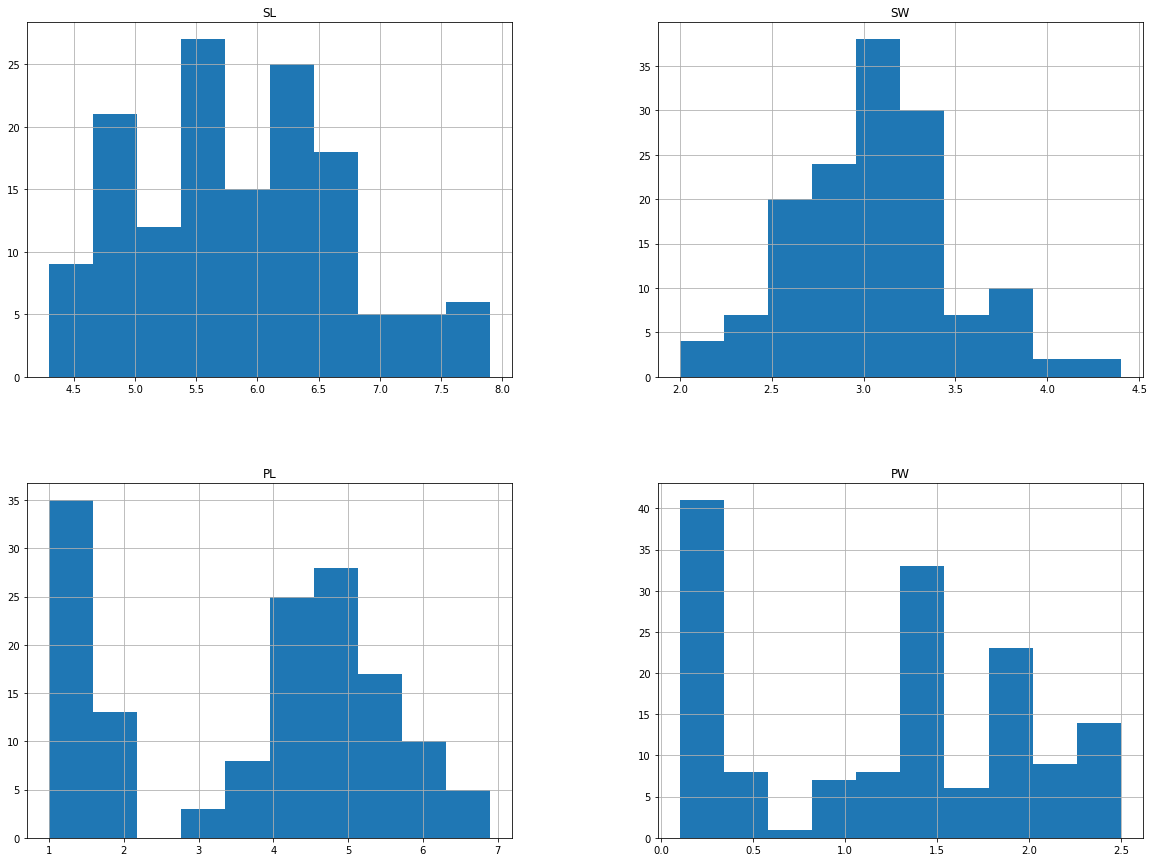

In [72]:
freqgraph = data.select_dtypes(include =['float'])
freqgraph.hist(figsize =(20,15))
plt.show()

In [73]:
for  i in ['SL','SW']:
    data[i] = data[i].fillna(data[i].median())
    
for  i in ['PL']:
    data[i] = data[i].fillna(data[i].mean())
        

In [74]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Check the outliers and handle outliers

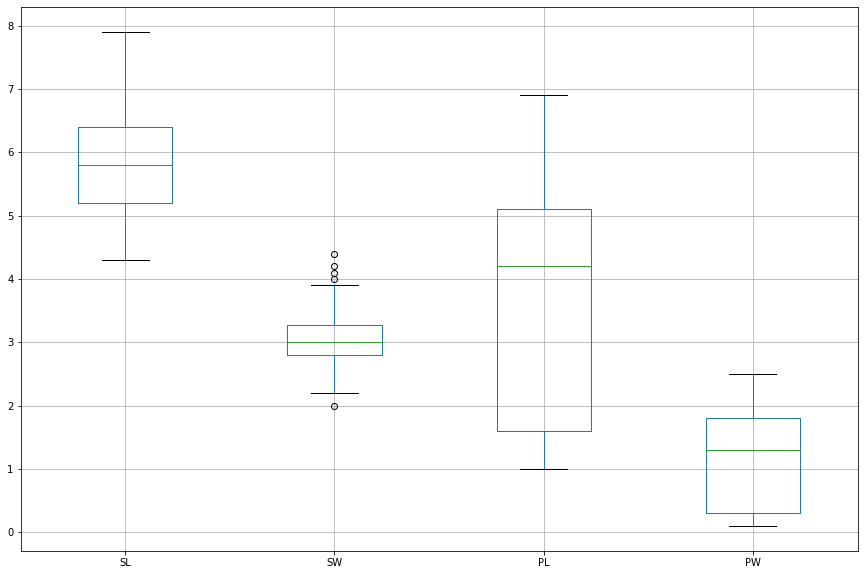

In [75]:
data.boxplot(figsize=(15,10))
plt.show()

In [76]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['SW']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['SW']>uplim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [77]:
data.drop([14, 15, 32, 33],inplace = True)

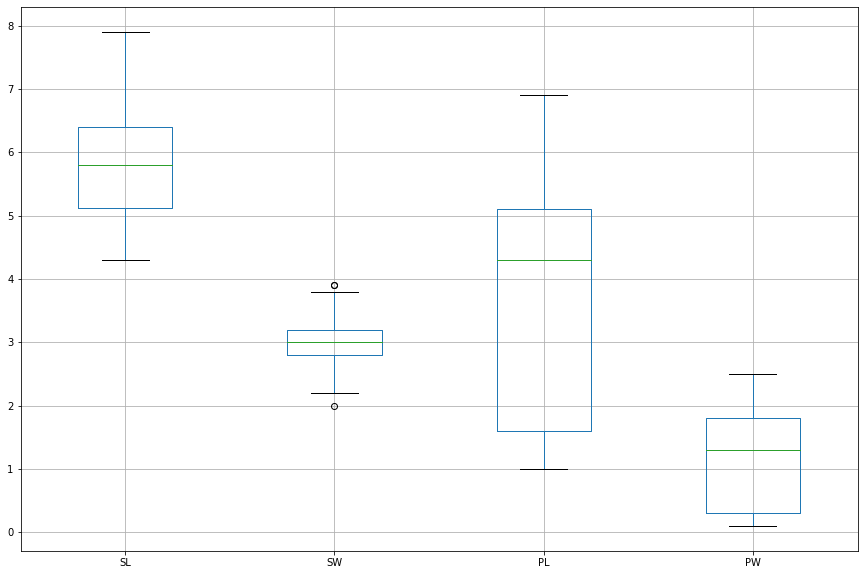

In [78]:
data.boxplot(figsize=(15,10))
plt.show()

In [ ]:
# data encoding

In [79]:
from sklearn.preprocessing import LabelEncoder
laben =LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=laben.fit_transform(data[a[i]])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40000,0.2,0
1,4.9,3.0,1.40000,0.2,0
2,5.8,3.2,1.30000,0.2,0
3,4.6,3.1,1.50000,0.2,0
4,5.0,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,2
146,6.3,2.5,5.00000,1.9,2
147,6.5,3.0,3.75625,2.0,2
148,6.2,3.4,5.40000,2.3,2


In [ ]:
#Correlation 

<AxesSubplot:>

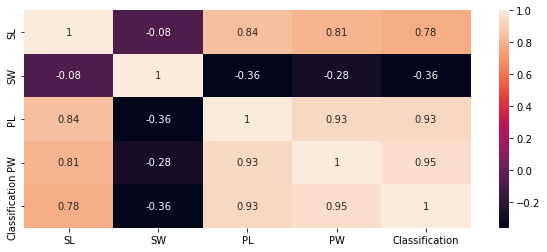

In [80]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True)

# Find out which classification model

In [81]:
y=data['Classification']
x=data.drop(['Classification'], axis=1)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 34,test_size =0.2 )

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
 #standard scaling

In [109]:
from sklearn.preprocessing  import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [110]:
data.describe()

,SL,SW,PL,PW,Classification
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.016438,3.820805,1.225342,1.027397
std,0.817166,0.382555,1.703421,0.755834,0.813212
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.125000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


# LinearRegression

In [111]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(x_train,y_train)
predictions= model.predict(x_test)

print(y_test)
print(predictions)

118    2
58     1
36     0
7      0
12     0
54     1
71     1
10     0
95     1
73     1
55     1
57     1
3      0
37     0
80     1
97     1
27     0
91     1
53     1
28     0
24     0
29     0
84     1
96     1
104    2
49     0
137    2
51     1
50     1
26     0
Name: Classification, dtype: int32
[2.8412078  1.60129273 0.0683846  0.11815349 0.10796579 1.79240258
 1.5375999  0.20764857 1.4363646  1.55234914 1.6078666  1.27163921
 0.18414277 0.10009817 1.42805285 1.55809771 0.20732513 1.66280184
 1.64768985 0.43847442 0.17456091 0.17627515 1.73201686 1.54310641
 2.50987936 0.12618283 2.10683841 1.68823963 1.63401592 0.30139572]


In [112]:
from sklearn.metrics import mean_squared_error
print('MSe is ',mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print('R squared value is ',r2_score(y_test,predictions))

MSe is  0.22590488618771667
R squared value is  0.44901247271288613


# LogisticRegression

In [113]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions= logmodel.predict(x_test)

In [114]:
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.6


In [115]:
confusion_matrix(y_test,predictions)

array([[12,  0,  0],
       [ 0,  3, 12],
       [ 0,  0,  3]], dtype=int64)

#   KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,15)
for K in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=K,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions= classifier.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    acc_values.append(acc)

In [117]:
acc_values

[0.6666666666666666,
 0.6666666666666666,
 0.6333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.7666666666666667,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6666666666666666,
 0.7]

Text(0, 0.5, 'accuracy')

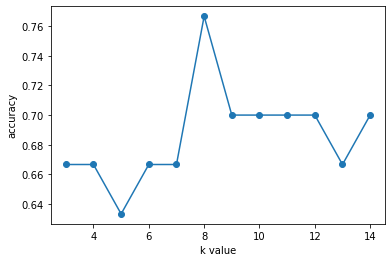

In [118]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [119]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [120]:
print('Accuracy is: ',accuracy_score(y_test,predictions))


Accuracy is:  0.7666666666666667


In [121]:
confusion_matrix(y_test,predictions)

array([[12,  0,  0],
       [ 0,  8,  7],
       [ 0,  0,  3]], dtype=int64)

# decision tree

In [122]:
from sklearn.tree  import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
predictions= dtmodel.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7


In [123]:
confusion_matrix(y_test,predictions)

array([[12,  0,  0],
       [ 0,  6,  9],
       [ 0,  0,  3]], dtype=int64)

# SVM

In [124]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear')
svmlinear.fit(x_train,y_train)
predictions= svmlinear.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.5666666666666667


In [125]:
svmpoly = SVC(kernel='poly',degree =3)
svmpoly.fit(x_train,y_train)
predictions= svmpoly.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.8666666666666667


In [126]:
svmradial = SVC(kernel='rbf')
svmradial.fit(x_train,y_train)
predictions= svmradial.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.6333333333333333


# RandomForest

In [127]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions= rf.predict(x_test)
predictions

array([2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0])

In [128]:
confusion_matrix(y_test,predictions)

array([[12,  0,  0],
       [ 0,  5, 10],
       [ 0,  0,  3]], dtype=int64)

In [129]:
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.6666666666666666


From these models accuracy is maximum nearly to 1 is for SVM polynomial model.
So we can conclude that from these models SVM polynomial can give the best results.